# Traversal of the space of train/test splits 

In this notebook we aim to understand the effect of the change in the train/test split ratio on various classifiers. We use various evaluation metrics in order to study its effect. For visualisation, we plot graphs that depict the variation of these performnce metrics with respect to train/test splits.

## Import Libraries

Importing all the libraries that are used. Some might not be needed by this notebook, but are included for debugging and fututre expansion. I have left out the custom helpers as they are not needed in this notebook.

In [1]:
import pandas as pd
import numpy as np
from itertools import cycle
import time

import sklearn
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, f1_score, accuracy_score, recall_score
from scipy import interp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## Load and prepare the data

I'll be using the ```vehicles.csv``` dataset. We load it using pandas.

In [3]:
path = '../../datasets/vehicles.csv'  # Path to dataset
df = pd.read_csv(path)

Let us now seperate the dependent feature and independent features. Here, Class is the dependent feature.

In [4]:
X = df.drop(labels='Class', axis=1)  # Drop the target attribute from the X variable
y = df.Class  # The target attribute to be predicted

## Classifier and metric selection

Now we create a Data Frame which will be used to store test ratios and performance scores.

In [5]:
metric_cols = [
    "Test Ratio",
    "Train Score",
    "Test Score",
    "Recall Score Macro",
    "f1 Score Macro"
]

metric_table = pd.DataFrame(columns=metric_cols)

We have used the following three classifiers:
1. Random forest Classifier- It uses a number of decision tree classifiers
2. Support Vector Classification- Its implementation is based on libsvm
3. Quadratic Discriminant Analysis- It works by fitting class conditional densities

We have chosen these to study the effect on different **types** of classifiers.

In [6]:
MLA = [
        ensemble.RandomForestClassifier(),

        svm.SVC(),
    
        discriminant_analysis.QuadraticDiscriminantAnalysis(),
        ]

## Tables and graphs

This function creates a table with the given range of test ratio for a given classifier. 

In [7]:
def get_scores(start, end, interval, clf):
    result_list = []
    for i in range (start, end, interval):
        result_dict = {}
        test_ratio = i/100
        
        result_dict["Test Ratio"] = test_ratio
        
        train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=test_ratio, stratify=y, random_state=42)
        train_X = (train_X - train_X.mean())/train_X.std()
        test_X = (test_X - test_X.mean())/test_X.std()
        clf.fit(train_X,train_y)
        y_pred = clf.predict(test_X)
        result_dict["Recall Score Macro"] = recall_score(test_y, y_pred, average='macro')
        result_dict["f1 Score Macro"] = f1_score(test_y, y_pred, average='macro')
        result_dict["Train Score"] = clf.score(train_X, train_y)
        result_dict["Test Score"] = clf.score(test_X, test_y)
        result_list.append(result_dict)
    return result_list

Now we create a function to prepare the table or plot the graph. We vary the value of test ratio from 0.01 to 0.1 and then from 0.1 to 0.9 and finally from 0.9 to 0.99. This is done to see the behaviour of the model with changing test ratio even at extreme points.

In [8]:
def plot_scores(metric, plot, clf):
        all_result_list = get_scores(1,10,1,clf)
        all_result_list.extend(get_scores(10,100,10,clf))
        all_result_list.extend(get_scores(91,100,1,clf))
        
        results = pd.DataFrame(all_result_list)
        print(clf.__class__.__name__)
        if(plot):
            tr = results["Test Ratio"]
            ts = results[metric]
            plt.plot(tr, ts)
            plt.xlabel('Test Ratio')
            plt.ylabel(metric)
            plt.show()
        else:
            display(clf)
            display(results)

Let us now examine how performance scores change with change in the train-test split by enumerating them in tables and visualising the variation through graphical plots. We shall also take a look at the parameters of the classifiers used (defaults are used).

**Note: it is observed from the graphs below that the tendency of variation is similar for almost all of them, so I would provide the inference drawn from these together at the end.** 

### Random Forest Classifier

In [9]:
plot_scores("", False, ensemble.RandomForestClassifier())

RandomForestClassifier


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

,Test Ratio,Recall Score Macro,f1 Score Macro,Train Score,Test Score
0,0.01,0.625000,0.550000,1.0,0.666667
1,0.02,0.875000,0.879058,1.0,0.882353
2,0.03,0.809524,0.803846,1.0,0.807692
3,0.04,0.652778,0.641136,1.0,0.647059
4,0.05,0.747727,0.748700,1.0,0.744186
5,0.06,0.729167,0.724523,1.0,0.725490
6,0.07,0.748810,0.738077,1.0,0.750000
7,0.08,0.675551,0.664831,1.0,0.676471
8,0.09,0.678947,0.662950,1.0,0.675325
9,0.10,0.705519,0.693297,1.0,0.705882


RandomForestClassifier


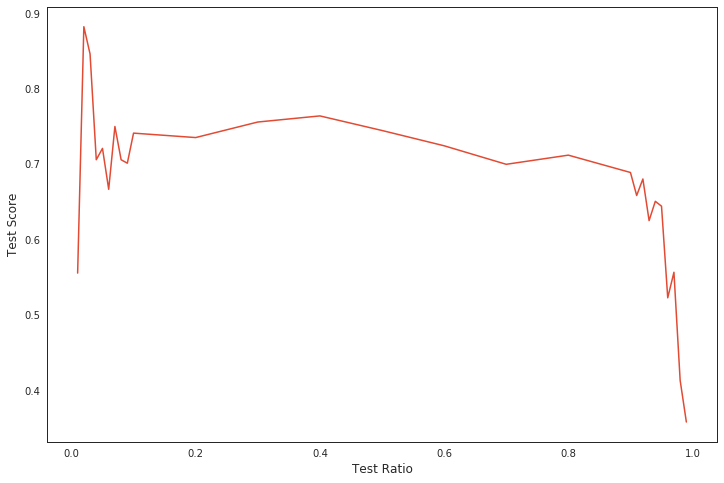

In [10]:
plot_scores("Test Score", True, ensemble.RandomForestClassifier())        

RandomForestClassifier


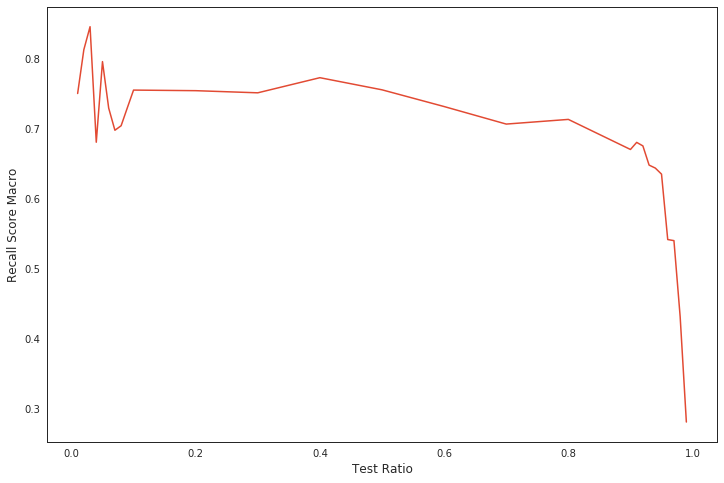

In [11]:
plot_scores("Recall Score Macro", True, ensemble.RandomForestClassifier())        

RandomForestClassifier


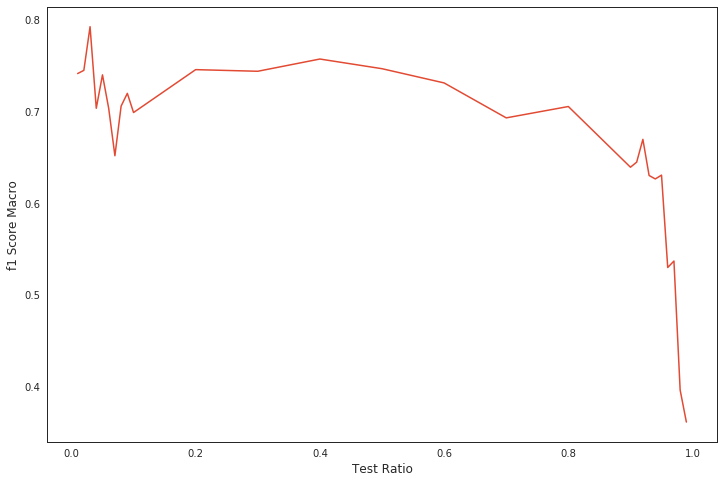

In [12]:
plot_scores("f1 Score Macro", True, ensemble.RandomForestClassifier())        

Barring extremities, the peak performance is observed to be at a test ratio of around 0.4.

### Support Vector Classification

In [13]:
plot_scores("", False, svm.SVC())

SVC


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

,Test Ratio,Recall Score Macro,f1 Score Macro,Train Score,Test Score
0,0.01,0.875000,0.866667,0.856631,0.888889
1,0.02,0.875000,0.875000,0.845597,0.882353
2,0.03,0.845238,0.845238,0.845122,0.846154
3,0.04,0.791667,0.784524,0.846059,0.794118
4,0.05,0.747727,0.737502,0.850560,0.744186
5,0.06,0.729167,0.711310,0.852830,0.725490
6,0.07,0.715476,0.703801,0.851145,0.716667
7,0.08,0.734375,0.725803,0.856041,0.735294
8,0.09,0.715058,0.707286,0.853056,0.714286
9,0.10,0.718019,0.704723,0.850197,0.717647


SVC


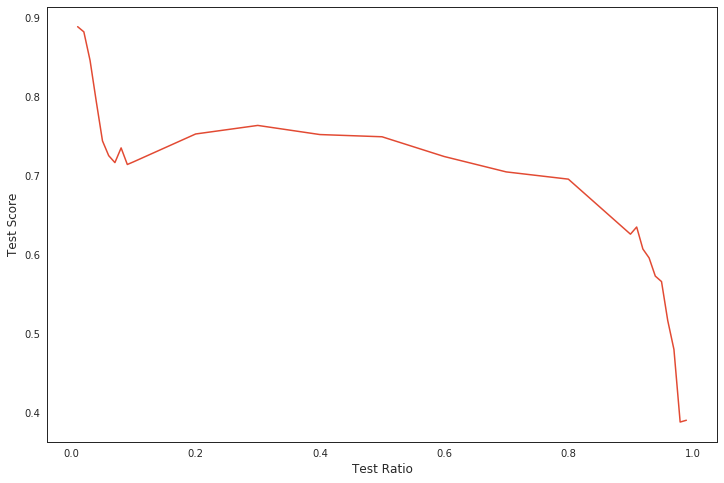

In [14]:
plot_scores("Test Score", True, svm.SVC())

SVC


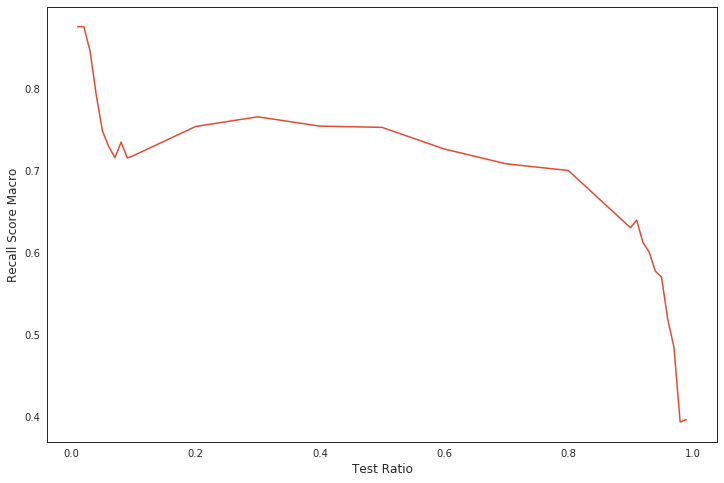

In [15]:
plot_scores("Recall Score Macro", True, svm.SVC())

SVC


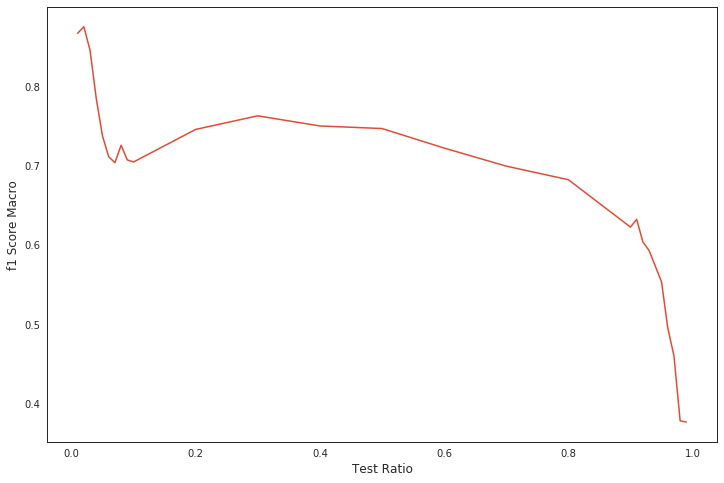

In [16]:
plot_scores("f1 Score Macro", True, svm.SVC())

Peak performance is at a test ratio of 0.3 but the graph is quite smooth even at the extremes.

### Quadratic Discriminant Analysis

In [17]:
plot_scores("", False, discriminant_analysis.QuadraticDiscriminantAnalysis())

QuadraticDiscriminantAnalysis


/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables 

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

,Test Ratio,Recall Score Macro,f1 Score Macro,Train Score,Test Score
0,0.01,0.875000,0.880952,0.912784,0.888889
1,0.02,0.762500,0.762500,0.911942,0.764706
2,0.03,0.886905,0.884158,0.913415,0.884615
3,0.04,0.819444,0.817202,0.912562,0.823529
4,0.05,0.813636,0.809935,0.915318,0.813953
5,0.06,0.804487,0.802030,0.916981,0.803922
6,0.07,0.766518,0.756658,0.917303,0.766667
7,0.08,0.807904,0.800061,0.919023,0.808824
8,0.09,0.792690,0.783994,0.915475,0.792208
9,0.10,0.811634,0.803002,0.911958,0.811765


/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables 

QuadraticDiscriminantAnalysis


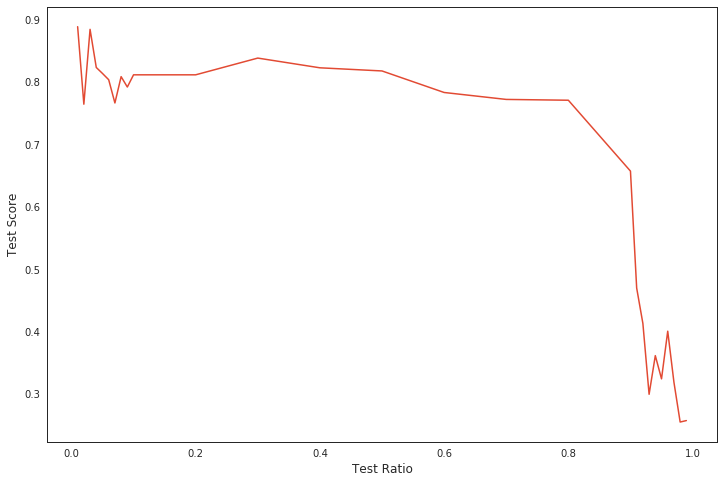

In [18]:
plot_scores("Test Score", True, discriminant_analysis.QuadraticDiscriminantAnalysis())        

/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables 

QuadraticDiscriminantAnalysis


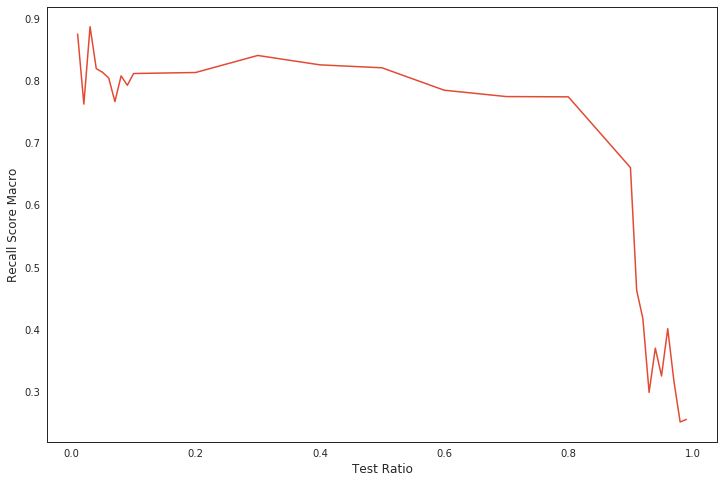

In [19]:
plot_scores("Recall Score Macro", True, discriminant_analysis.QuadraticDiscriminantAnalysis())

/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables 

QuadraticDiscriminantAnalysis


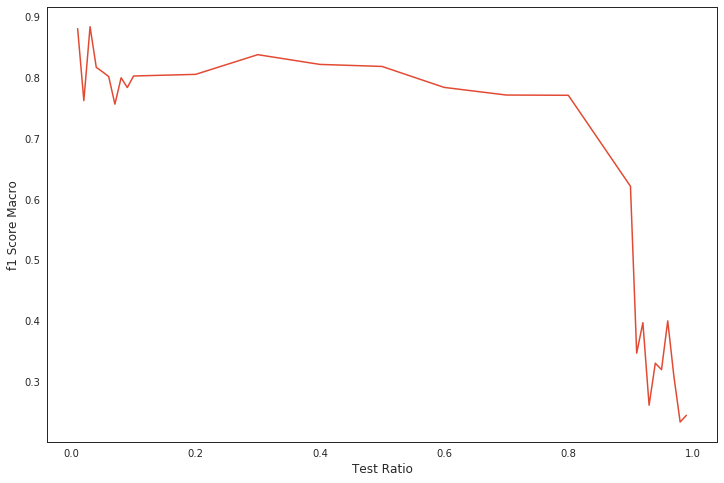

In [20]:
plot_scores("f1 Score Macro", True, discriminant_analysis.QuadraticDiscriminantAnalysis())

The peak performance, again, is at a test ratio of 0.3.

## What I learned

### Direct inference

What we can conclude from this is the fact that whether our dataset is sufficiently large. If the scores remain flat for a large portion of the graph in the middle, we can say that the dataset is sufficient in size and uniformity and vice-versa.

In our case the curves are not that flat in the middle but not too spiky. This means that the dataset size is not great but data distribution is quite uniform, which is in rhythm with what a quick observation of the dataset suggests.

### Other points

Through this exploration I observed a few other things too. From the visualisation of the test ratio and various metrics, the following inferences can be made (but they are quite natural and not surprising in any manner):
1. Random Forest Classifier:
  * Since we have used default parameters which have sufficient estimators, we always get a train_score of 1 as the tree descends to the leaves.
  * Recall Score Macro and f1 Score Macro are also 1.
  * The test scores are less at the extreme extremes due to this dependance on trained data. 
2. Support Vector Classifier:
  * Test Scores are inversely proportional to Test ratio (and does not suffer due to the overfitting at the left end)
  * f1 score macro has almost the same trend as recall score macro, the only difference being that it decreases           slightly faster (probably due to the precision being tighter).
3. Quadratic discriminant analysis:
  * Test scores are inversely proportional to test ratio but the value suddenly decreases as it approaches 0.9 (which is also understandable).